In [1]:
import tensorflow as tf
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
def load_data(dir_list,image_size):

    #load all images in a directory
    x = []
    y = []
    image_width, image_height = image_size

    for directory in dir_list:
        for filename in listdir(directory):
            image = cv2.imread(directory + '\\'+filename)   #load the image
#             image = crop_brain_contour(image,plot=False)  # crop the brain part and ignore unnecessary part of image
            image = cv2.resize(image,dsize=(image_width, image_height),interpolation=cv2.INTER_CUBIC)  #resizing
            image = image /255   # normalize values
            x.append(image) #convert image to numpy array and append it to X

            if directory[-3:] == "yes":
                y.append([1])
            else:
                y.append([0])
    
    x = np.array(x)
    y = np.array(y)

    x, y = shuffle(x,y)   #shuffle the data

    print(f"Number of examples is: {len(x)}")
    print(f"X shape is: {x.shape}")
    print(f"y shape is: {y.shape}")

    return x,y

In [14]:
train_path = "Brain_image_dataSet/"
yes = train_path + "train/yes"
no = train_path + "train/no"

In [15]:
IMG_WIDTH, IMG_HEIGHT = (180,180)

In [16]:
xtrain, ytrain = load_data([yes,no],(IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 2100
X shape is: (2100, 180, 180, 3)
y shape is: (2100, 1)


In [19]:
test_path = "Brain_image_dataSet/"
yes = test_path + "test/yes"
no = test_path + "test/no"

In [20]:
xtest, ytest = load_data([yes,no],(IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 900
X shape is: (900, 180, 180, 3)
y shape is: (900, 1)


In [17]:
def plot_sample_images(x,y,n=50):

    for label in [0,1]:
        images = x[np.argwhere(y == label)]
        n_images = images[:n]

        columns_n  = 10
        rows_n = int(n/columns_n)

        plt.figure(figsize=(20,10))

        i=1
        for image in n_images:
            plt.subplot(rows_n,columns_n,i)
            plt.imshow(image[0])

            plt.tick_params(axis='both',which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False,labeltop=False,labelleft=False,labelright=False)
            
            i += 1

        label_to_str = lambda label:"Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

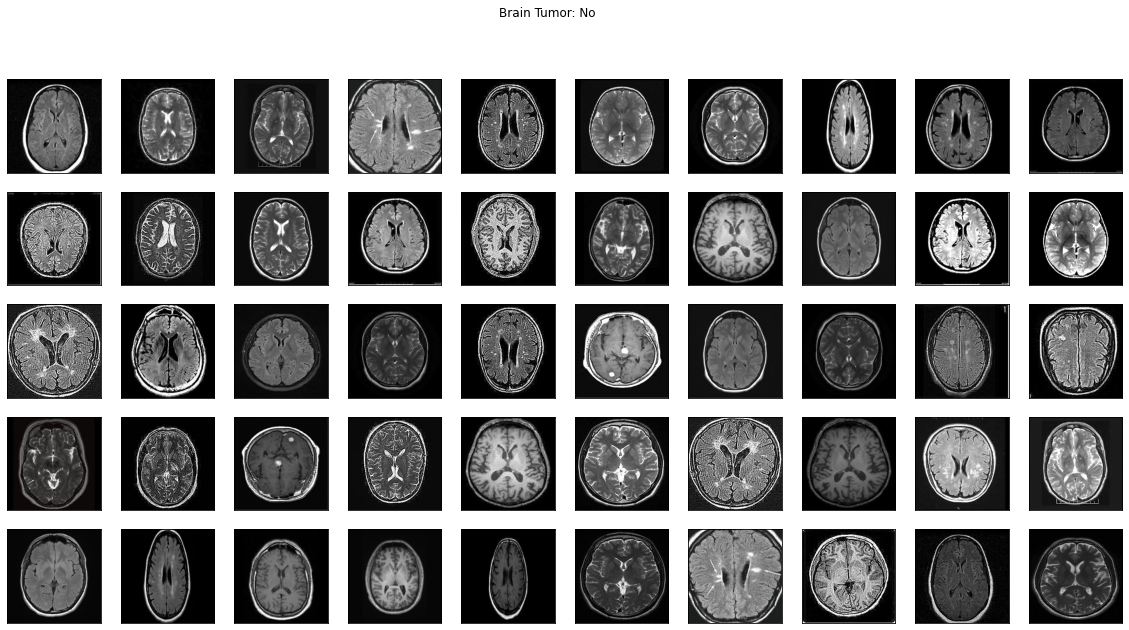

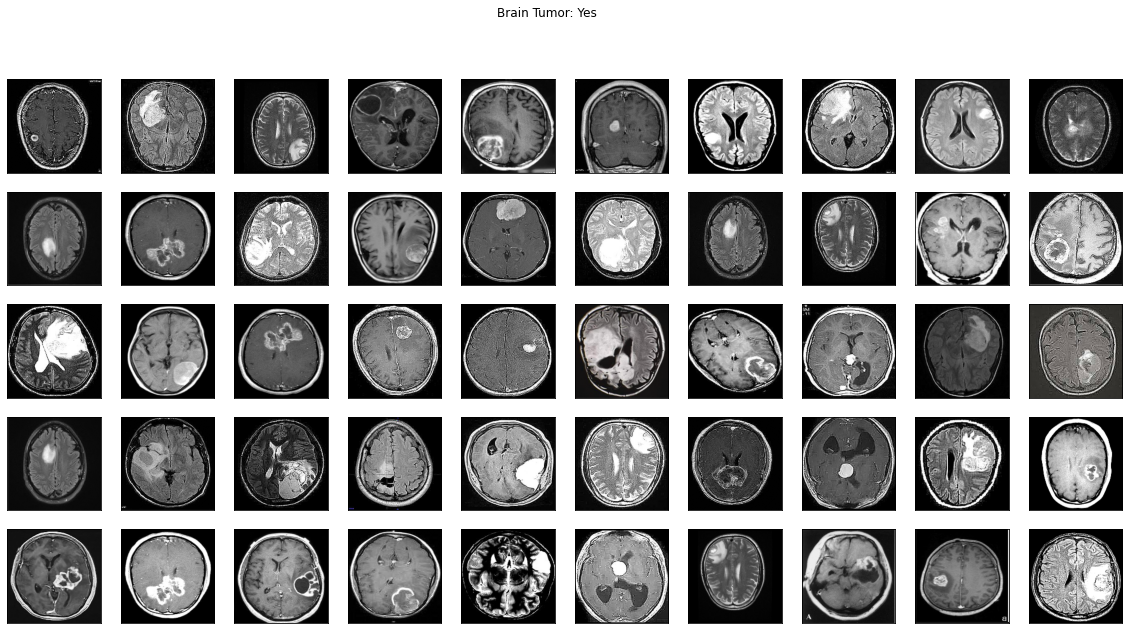

In [18]:
plot_sample_images(xtrain,ytrain)

In [21]:
model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(255, activation='relu'),
  tf.keras.layers.Dense(2)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [25]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest), epochs=8)

Epoch 1/8
66/66 [==============================] - 40s 605ms/step - loss: 0.4746 - accuracy: 0.7700 - val_loss: 0.5063 - val_accuracy: 0.7656
Epoch 2/8
66/66 [==============================] - 36s 550ms/step - loss: 0.4451 - accuracy: 0.7929 - val_loss: 0.4581 - val_accuracy: 0.7900
Epoch 3/8
66/66 [==============================] - 39s 592ms/step - loss: 0.4027 - accuracy: 0.8229 - val_loss: 0.4321 - val_accuracy: 0.8067
Epoch 4/8
66/66 [==============================] - 40s 614ms/step - loss: 0.3812 - accuracy: 0.8333 - val_loss: 0.3797 - val_accuracy: 0.8300
Epoch 5/8
66/66 [==============================] - 40s 610ms/step - loss: 0.3033 - accuracy: 0.8757 - val_loss: 0.3611 - val_accuracy: 0.8233
Epoch 6/8
66/66 [==============================] - 40s 598ms/step - loss: 0.2416 - accuracy: 0.9071 - val_loss: 0.2989 - val_accuracy: 0.8978
Epoch 7/8
66/66 [==============================] - 39s 590ms/step - loss: 0.1919 - accuracy: 0.9300 - val_loss: 0.2572 - val_accuracy: 0.9100
Epoch 

In [26]:
history = model.history.history

In [27]:
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [28]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss,label="training loss")
    plt.plot(val_loss,label="validation loss")
    plt.title("Loss")
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_accuracy,label="training accuracy")
    plt.plot(val_accuracy,label="validation accuracy")
    plt.title("Accuracy")
    plt.legend()
    plt.show()

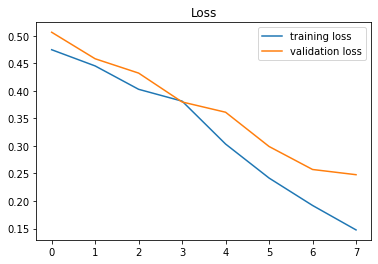

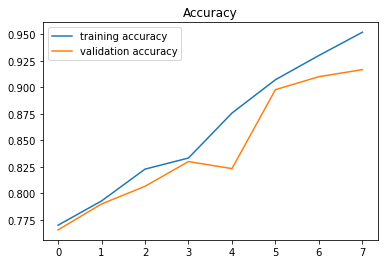

In [29]:
plot_metrics(history)

In [31]:
loss, accu = model.evaluate(xtest,ytest)

29/29 [==============================] - 3s 107ms/step - loss: 0.2477 - accuracy: 0.9167


In [32]:
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accu}")

Test Loss: 0.2476947158575058
Test Accuracy: 0.9166666865348816


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

In [42]:
ypred = model.predict(xtest)

29/29 [==============================] - 3s 118ms/step


In [43]:
ypred.shape

(900, 2)

In [44]:
class_names = ['no','yes']

In [50]:
score = tf.nn.softmax(ypred)

pred = np.argmax(score)
# score1 = 100 * np.max(score)

309